<a href="https://colab.research.google.com/github/tapesh-santra/Dublin-housing/blob/master/MNIST_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. All imports
https://www.kaggle.com/yufengg/emnist-gpu-keras-to-tf

# 1. Mount the file system

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# 2. All imports

In [ ]:
from numpy.random import seed
seed(42)# keras seed fixing
import tensorflow as tf
tf.random.set_seed(42)

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import scipy.io


# 3. Read in training and testing datasets

In [ ]:

#train_data_path = '/content/drive/My Drive/datasets/ocr/emnist/emnist-balanced-train.zip'
#test_data_path = '/content/drive/My Drive/datasets/ocr/emnist/emnist-balanced-test.zip'

#train_data = pd.read_csv(train_data_path, header=None,compression = 'zip')
#test_data = pd.read_csv(test_data_path, header=None,compression = 'zip')

[(array([[(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[24],
       [36],
       [ 5],
       ...,
       [ 9],
       [36],
       [ 1]], dtype=uint8), array([[  33],
       [3568],
       [3100],
       ...,
       [3406],
       [ 466],
       [ 189]], dtype=uint16))]],
      dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')]), array([[(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[24],
       [22],
       [28],
       ...,
       [ 3],
       [ 3],
       [ 7]], dtype=uint8), array([[ 242],
       [ 125],
       [ 382],
       ...,
       [  94],
       [4037],
       [1125]], dtype=uint16))]],
      dtype=[('images',

# 4. Define class mapping for training and testing data

In [ ]:
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

In [ ]:
# 5. Display one image and the corresponding label

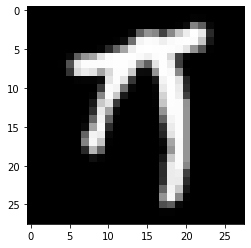

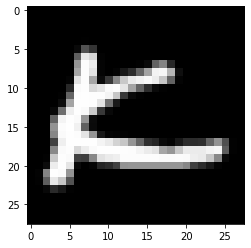

K


In [ ]:
num_classes = len(train_data[0].unique())
row_num = 8

plt.imshow(train_data.values[row_num, 1:].reshape([28, 28]), cmap='Greys_r')
plt.show()

img_flip = np.transpose(train_data.values[row_num,1:].reshape(28, 28), axes=[1,0]) # img_size * img_size arrays
plt.imshow(img_flip, cmap='Greys_r')

plt.show()
print('Image belongs to class: ', class_mapping[train_data.values[row_num,0]])

In [ ]:
def show_img(data, row_num):
    img_flip = np.transpose(data.values[row_num,1:].reshape(28, 28), axes=[1,0]) # img_size * img_size arrays
    plt.title('Class: ' + str(data.values[row_num,0]) + ', Label: ' + str(class_mapping[data.values[row_num,0]]))
    plt.imshow(img_flip, cmap='Greys_r')

In [ ]:
# 10 digits, 26 letters, and 11 capital letters that are different looking from their lowercase counterparts
num_classes = 47 
img_size = 28

def img_label_load(data, num_classes=None):
    #data = pd.read_csv(data_path, header=None)
    data_rows = len(data)
    if not num_classes:
        num_classes = len(data[0].unique())
    
    # this assumes square imgs. Should be 28x28
    img_size = int(np.sqrt(len(data.iloc[0][1:])))
    
    # Images need to be transposed. This line also does the reshaping needed.
    imgs = np.transpose(data.values[:,1:].reshape(data_rows, img_size, img_size, 1), axes=[0,2,1,3]) # img_size * img_size arrays
    
    labels = keras.utils.to_categorical(data.values[:,0], num_classes) # one-hot encoding vectors
    
    return imgs/255., labels

In [ ]:
model = keras.models.Sequential()

# model.add(keras.layers.Reshape((img_size,img_size,1), input_shape=(784,)))
model.add(keras.layers.Conv2D(filters=16, strides = 2, kernel_size=(3,3), activation='relu', 
                              input_shape=(img_size,img_size,1)))
#model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.25))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3) , activation='relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.25))

model.add(keras.layers.Conv2D(filters=64, strides=2, kernel_size=(3,3), activation='relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.25))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.25))

# model.add(keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(.25))

model.add(keras.layers.Dense(units=num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 13, 13, 16)        160       
_________________________________________________________________
dropout_16 (Dropout)         (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
dropout_17 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 64)          18496     
_________________________________________________________________
dropout_18 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 64)         

In [ ]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 13, 13, 16]
[None, 13, 13, 16]
[None, 11, 11, 32]
[None, 11, 11, 32]
[None, 5, 5, 64]
[None, 5, 5, 64]
[None, 3, 3, 64]
[None, 3, 3, 64]
[None, None]
[None, 128]
[None, 128]
[None, 47]


In [ ]:
X, y = img_label_load(train_data)

In [ ]:
data_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=.2)
## consider using this for more variety
''' data_generator_with_aug = keras.preprocessing.image.ImageDataGenerator(validation_split=.2,
                                            width_shift_range=.05, height_shift_range=.05,
                                            rotation_range=15, zoom_range=.05, shear_range=.1)
'''

training_data_generator = data_generator.flow(X, y, subset='training')
validation_data_generator = data_generator.flow(X, y, subset='validation')
history = model.fit_generator(training_data_generator, 
                              steps_per_epoch=500, epochs=120, # can change epochs to 10
                              validation_data=validation_data_generator)

# test model
test_X, test_y = img_label_load(test_data)
test_data_generator = data_generator.flow(test_X, test_y)

loss,accuracy = model.evaluate_generator(test_data_generator)
print('loss: ',loss, 'accuracy: ',accuracy)

# Save model

from keras.models import model_from_json

# serialize model to JSON
model_file = '/content/drive/My Drive/datasets/ocr/emnist/models/models_cat_47.json'
model_weights_file = '/content/drive/My Drive/datasets/ocr/emnist/models/models_cat_47.h5'
model_json = model.to_json()
with open(model_file, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(model_weights_file)
print("Saved model to disk")


# load json and create model
json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(model_weights_file)
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
loss,accuracy = loaded_model.evaluate_generator(test_data_generator)
print('loss: ',loss, 'accuracy: ',accuracy)

Epoch 1/120
500/500 [==============================] - 15s 29ms/step - loss: 2.2236 - accuracy: 0.3851 - val_loss: 0.7885 - val_accuracy: 0.6863
Epoch 2/120
500/500 [==============================] - 14s 29ms/step - loss: 1.1573 - accuracy: 0.6409 - val_loss: 0.8834 - val_accuracy: 0.7527
Epoch 3/120
500/500 [==============================] - 14s 29ms/step - loss: 0.9072 - accuracy: 0.7139 - val_loss: 0.5711 - val_accuracy: 0.7969
Epoch 4/120
500/500 [==============================] - 14s 29ms/step - loss: 0.8155 - accuracy: 0.7371 - val_loss: 0.3892 - val_accuracy: 0.8144
Epoch 5/120
500/500 [==============================] - 14s 29ms/step - loss: 0.7424 - accuracy: 0.7564 - val_loss: 0.5222 - val_accuracy: 0.8173
Epoch 6/120
500/500 [==============================] - 15s 29ms/step - loss: 0.6763 - accuracy: 0.7737 - val_loss: 0.3654 - val_accuracy: 0.8335
Epoch 7/120
500/500 [==============================] - 14s 29ms/step - loss: 0.6458 - accuracy: 0.7851 - val_loss: 0.3371 - val_ac

# Try a different method of saving a loading

In [ ]:
model_file = '/content/drive/My Drive/datasets/ocr/emnist/models/models_cat_47_1.h5'
model.save(model_file)

from keras.models import load_model
loaded_model = loaded_model(model_file)
#loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
loss,accuracy = loaded_model.evaluate_generator(test_data_generator)
print('loss: ',loss, 'accuracy: ',accuracy)

ValueError: ignored

In [ ]:
!ls /content/drive/My\ Drive/datasets/ocr/emnist/

emnist-balanced-test.zip  emnist-balanced-train.zip


In [ ]:
model.evaluate_generator(test_data_generator)

[0.2913113832473755, 0.904902458190918]

In [ ]:
# Next, export the TensorFlow Estimator to SavedModel

from functools import partial
import tensorflow as tf

def serving_input_receiver_fn():
    input_ph = tf.placeholder(tf.string, shape=[None], name='image_binary')
    images = tf.map_fn(partial(tf.image.decode_image, channels=1), input_ph, dtype=tf.uint8)
    images = tf.cast(images, tf.float32) / 255.
    images.set_shape([None, 28, 28, 1])

    # the first key is the name of first layer of the (keras) model. 
    # The second key is the name of the key that will be passed in the prediction request
    return tf.estimator.export.ServingInputReceiver({model_input_name: images}, {'bytes': input_ph})

In [ ]:
export_path = estimator_model.export_savedmodel('./export', serving_input_receiver_fn=serving_input_receiver_fn)
export_path

In [ ]:
with open('model.json', 'w') as f:
    f.write(model.to_json())
model.save_weights('./model.h5')

model.save('./full_model.h5')
!ls -lh